# Assignment 2
* In this assignment you will be working with three data files from iMDB:
    * cast.csv
    * release_dates.csv
    * titles.csv
* Using the appropriate file(s), answer the following questions
* Some questions can be completed with one-liners while others are a bit more involved
* Where appropriate, answers should also provide brief commentary
* Exclude data that doen't make senss, i.e. data from the future
* Once complete upload this notebook to your classwork Github repo and post the link on Canvas 

In [1]:
import pandas as pd
import matplotlib as plt
import numpy

cast = pd.read_csv('C:/Users/migue/OneDrive/Documentos/4. Babson/1. Miguel Torrealba Schwarz/8. Semester 2/2.OIM7502_Advanced_Programming/0. Class Material/data/cast.csv')
release = pd.read_csv('C:/Users/migue/OneDrive/Documentos/4. Babson/1. Miguel Torrealba Schwarz/8. Semester 2/2.OIM7502_Advanced_Programming/0. Class Material/data/release_dates.csv')
titles = pd.read_csv('C:/Users/migue/OneDrive/Documentos/4. Babson/1. Miguel Torrealba Schwarz/8. Semester 2/2.OIM7502_Advanced_Programming/0. Class Material/data/titles.csv')



### 1. Conduct a high level assessment of the three data files, i.e. how many records are there, what kind of data, etc. Summarize your findings with annotation. 

In [2]:
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3442902 entries, 0 to 3442901
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 157.6+ MB


In [3]:
release.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443486 entries, 0 to 443485
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   title    443485 non-null  object
 1   year     443486 non-null  int64 
 2   country  443486 non-null  object
 3   date     443486 non-null  object
dtypes: int64(1), object(3)
memory usage: 13.5+ MB


In [4]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226013 entries, 0 to 226012
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   226012 non-null  object
 1   year    226013 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.4+ MB


### 2. How many movies have the title North by Northwest

In [5]:
north_by_northwest_movies = titles[titles['title'] == 'North by Northwest']
number_of_movies = len(north_by_northwest_movies)

print(number_of_movies)

1


### 3. How many version of Hamlet are there, when was the first made? the last?

In [6]:
hamlet = titles[titles['title'] == 'Hamlet']

# Number of versions of Hamlet
number_of_hamlet_versions = len(hamlet)
print(f"Number of versions of 'Hamlet': {number_of_hamlet_versions}")

# Find the release year of the first version
first_hamlet_year = hamlet['year'].min()
print(f"The first version of 'Hamlet' was made in: {first_hamlet_year}")

# Find the release year of the last version
last_hamlet_year = hamlet['year'].max()
print(f"The last version of 'Hamlet' was made in: {last_hamlet_year}")

Number of versions of 'Hamlet': 20
The first version of 'Hamlet' was made in: 1910
The last version of 'Hamlet' was made in: 2017


### 4. List all the movies called Treasure Island from oldest to newest

In [7]:
treasure_island = titles[titles['title'] == 'Treasure Island']

# Number of movies of Treasure island
number_treasure_island = len(treasure_island)

# Sort the DataFrame by the 'year' column in ascending order
sorted_treasure_island = treasure_island.sort_values(by='year')

# Display the sorted DataFrame
print("Number of movies calles 'Treasure Island':", number_treasure_island)
print("List of movies called 'Treasure Island' from oldest to newest:")
print(sorted_treasure_island)


Number of movies calles 'Treasure Island': 8
List of movies called 'Treasure Island' from oldest to newest:
                  title  year
180911  Treasure Island  1918
108853  Treasure Island  1920
87953   Treasure Island  1934
126321  Treasure Island  1950
190233  Treasure Island  1972
122150  Treasure Island  1973
52099   Treasure Island  1985
36752   Treasure Island  1999


### 5. How many movies were made in 1950? 1980? 2000? What conclusions can you draw from these data points?

In [8]:
# Count the number of movies made in 1950, 1980, and 2000
movies_1950 = len(titles[titles['year'] == 1950])
movies_1980 = len(titles[titles['year'] == 1980])
movies_2000 = len(titles[titles['year'] == 2000])


# Display the results
print("Number of movies made in 1950:", movies_1950)
print("Number of movies made in 1980:", movies_1980)
print("Number of movies made in 2000:", movies_2000)


Number of movies made in 1950: 1109
Number of movies made in 1980: 1750
Number of movies made in 2000: 2568


### 6. How big was the cast of Metropolis


In [9]:
metropolis_cast = cast[cast['title'] == 'Metropolis']

# Count the size of the cast for 'Metropolis'
cast_size_metropolis = len(metropolis_cast)

# Display the results
print("The cast size of 'Metropolis' is:", cast_size_metropolis)


The cast size of 'Metropolis' is: 33


### 7. How many roles for actors were there 1950's? 1990's

In [10]:
# 1950s
roles_1950s = cast[(cast['year'] >= 1950) & (cast['year'] < 1960)]

# 1990s
roles_1990s = cast[(cast['year'] >= 1990) & (cast['year'] < 2000)]

# Count number of roles for actors in the 1950s and the 1990s
roles_count_1950s = len(roles_1950s)
roles_count_1990s = len(roles_1990s)

# Display the number of roles for actors in the 1950s and the 1990s
print("Number of roles for actors in the 1950s:", roles_count_1950s)
print("Number of roles for actors in the 1990s:",roles_count_1990s)


Number of roles for actors in the 1950s: 209890
Number of roles for actors in the 1990s: 361218


### 8. How many roles for actors & actresses over time? Output should be a line graph

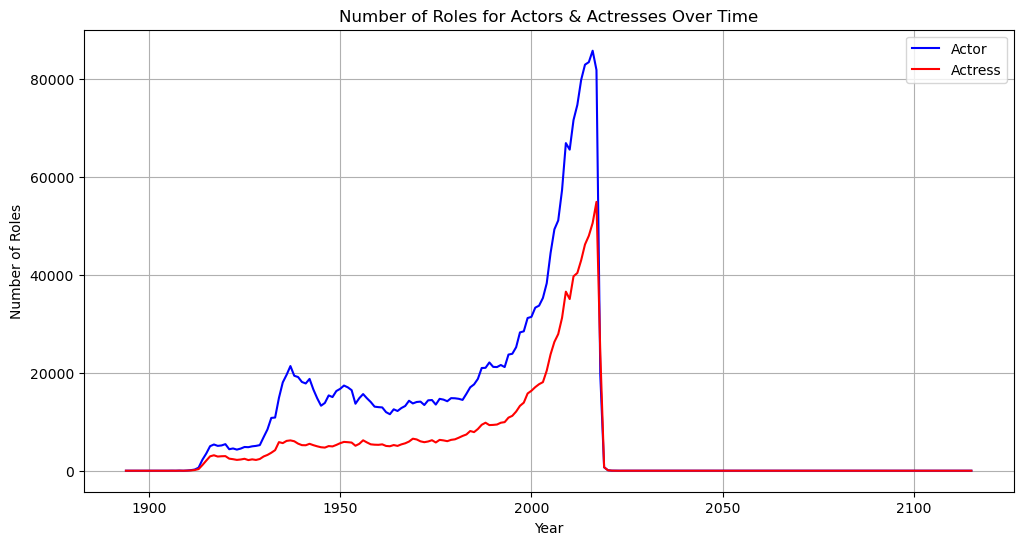

In [11]:
import matplotlib.pyplot as plt

# Group the cast DataFrame by year and type (actor/actress) and count the roles
roles_over_time = cast.groupby(['year', 'type']).size().unstack().fillna(0)

# Plotting a line graph
plt.figure(figsize=(12, 6))
plt.plot(roles_over_time.index, roles_over_time['actor'], label='Actor', color='blue')
plt.plot(roles_over_time.index, roles_over_time['actress'], label='Actress', color='red')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number of Roles')
plt.title('Number of Roles for Actors & Actresses Over Time')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

### 9. How many "leading roles" were there in the 2000's?

In [12]:
leading_roles_2000s = cast[(cast['year'] >= 2000) & (cast['year'] < 2010) & (cast['n'] == 1)]

# Count the number of roles 2000s
leading_roles_count_2000s = len(leading_roles_2000s)

# Display the number of leading roles in the 2000s
print("Number of 'leading roles' in the 2000s:", leading_roles_count_2000s)

Number of 'leading roles' in the 2000s: 23593


### 10. How many roles received no ranking in the 2000's? 1950's. What conclusions can you draw from these two data points?

In [13]:
no_ranking_2000s = cast[(cast['year'] >= 2000) & (cast['year'] < 2010) & cast['n'].isna()]
no_ranking_1950s = cast[(cast['year'] >= 1950) & (cast['year'] < 1960) & cast['n'].isna()]

# Count the number of roles with no ranking in the 2000s and the 1950s
no_ranking_count_2000s = len(no_ranking_2000s)
no_ranking_count_1950s = len(no_ranking_1950s)

# Display the number of roles with no ranking in the 2000s and the 1950s
print("Number of roles with no ranking in the 2000s:", no_ranking_count_2000s)
print("Number of roles with no ranking in the 1950s:", no_ranking_count_1950s)

#Changes in industry standards or practices over time could contribute to variations in the availability of ranking information.
#The number of roles without ranking in the 2000s might indicate a broader range of roles or different categorization practices in contemporary films.
#Understanding the role and significance of unranked roles could provide insights into the dynamics of the film industry.


Number of roles with no ranking in the 2000s: 232037
Number of roles with no ranking in the 1950s: 95406


### 11. Plot the number of films made in each decade

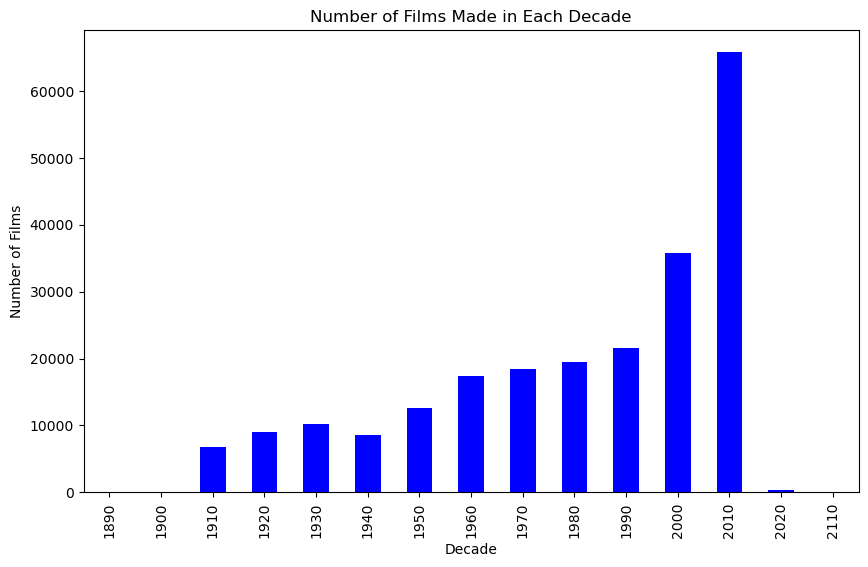

In [14]:
import matplotlib.pyplot as plt

# New column 'decade' in the titles DataFrame
titles['decade'] = (titles['year'] // 10) * 10

# Group the titles DataFrame by decade and count the number of films
films_per_decade = titles.groupby('decade').size()

# Plotting a bar graph
plt.figure(figsize=(10, 6))
films_per_decade.plot(kind='bar', color='b')

# Adding labels and title
plt.xlabel('Decade')
plt.ylabel('Number of Films')
plt.title('Number of Films Made in Each Decade')

# Plot
plt.show()

### 12. Plot the number of films with a Rustler character over time

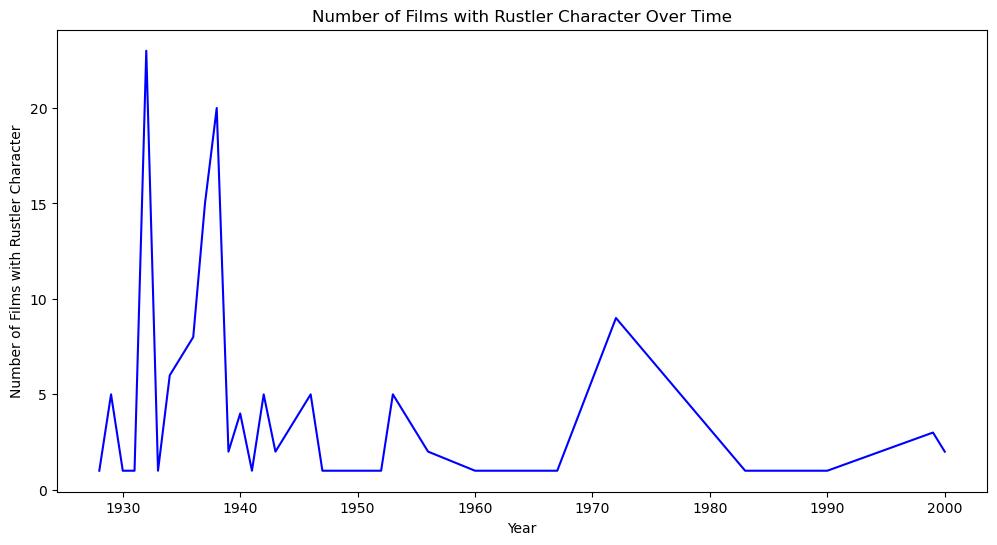

In [15]:
import matplotlib.pyplot as plt

rustler_movies = cast[cast['character'] == 'Rustler']

# Group the rustler_movies DataFrame by year and count the number of films
rustler_per_year = rustler_movies.groupby('year').size()

# Plotting a line graph
plt.figure(figsize=(12, 6))
plt.plot(rustler_per_year.index, rustler_per_year, color='b')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number of Films with Rustler Character')
plt.title('Number of Films with Rustler Character Over Time')

# Display the plot
plt.show()


### 13. What are the top ten character names of all time?

In [16]:
# Group the cast DataFrame by character name and count the occurrences
top_characters = cast['character'].value_counts().head(10)

# Print the top ten character names
print("Top Ten Character Names of All Time:")
print(top_characters)


Top Ten Character Names of All Time:
character
Himself        19637
Dancer         12019
Extra          10848
Reporter        7818
Doctor          6963
Party Guest     6786
Student         6631
Policeman       6424
Bartender       6290
Herself         6269
Name: count, dtype: int64


### 14. Which actor appeared in the most films in the 1990's decade?

In [17]:
movies_1990s = cast[(cast['year'] >= 1990) & (cast['year'] < 2000)]

# Group the DataFrame by actor and count the number of films
actor_appearances_1990s = movies_1990s['name'].value_counts()

# Get the actor with the most appearances
most_appearances_actor = actor_appearances_1990s.idxmax()
number_of_appearances = actor_appearances_1990s.max()

print("The actor who appeared in the most films in the 1990s is", most_appearances_actor, "with", number_of_appearances, "films.")

The actor who appeared in the most films in the 1990s is Shakti Kapoor with 143 films.


### 15. What are the top 10 roles that start with Science?

In [18]:
science_roles = cast[cast['character'].str.lower().str.startswith('science', na=False)]

# Get the top 10 roles
top_10_science_roles = science_roles['character'].value_counts().head(10)


# Print the top 10 science-related roles
print("Top 10 Roles Starting with 'Science':")
print(top_10_science_roles)

Top 10 Roles Starting with 'Science':
character
Science Teacher         57
Science Fair Student     9
Science Student          6
Science Fair Judge       6
Science Fair Kid         5
Science Reporter         5
Science Kid              5
Science                  4
Science Fair Teacher     3
Science Officer          3
Name: count, dtype: int64


### 16. What film has the largest cast

In [19]:
# Find the entry with the largest cast in the cast DataFrame
largest_cast_entry = cast.loc[cast['n'].idxmax()]

# Get the film title and the size of the cast
film_with_largest_cast = largest_cast_entry['title']
largest_cast_size = int(largest_cast_entry['n'])

print("The film with the largest cast is",film_with_largest_cast, "with a cast size of", largest_cast_size)


The film with the largest cast is Tribulation with a cast size of 33613


### 17. Generate descriptive statistics for cast size. Briefly comment on the results

In [20]:
#Group by title to have the same movie grouped together
cast_size_film = cast.groupby('title').count()
cast_size_statistics = cast_size_film.describe()
print("Descriptive Statistics for Cast Sizes:\n", cast_size_statistics)

#This tell us that there are 168254 number of casts and that the average number of people per film is 20.46


Descriptive Statistics for Cast Sizes:
                 year           name           type      character  \
count  168254.000000  168254.000000  168254.000000  168254.000000   
mean       20.462491      20.462491      20.462491      20.462444   
std        24.206663      24.206663      24.206663      24.206624   
min         1.000000       1.000000       1.000000       1.000000   
25%         6.000000       6.000000       6.000000       6.000000   
50%        13.000000      13.000000      13.000000      13.000000   
75%        26.000000      26.000000      26.000000      26.000000   
max      1364.000000    1364.000000    1364.000000    1364.000000   

                   n  
count  168254.000000  
mean       12.570988  
std        17.335979  
min         0.000000  
25%         1.000000  
50%         8.000000  
75%        16.000000  
max       688.000000  


### 18. How many films has Natalie Portman been in in each year throughout her career?

In [21]:
import matplotlib.pyplot as plt

natalie_portman_films = cast[cast['name'] == 'Natalie Portman']

# Group the DataFrame by year and count the number of films each year
natalie_portman_films_per_year = natalie_portman_films.groupby('year').size()

print("Number of films Natalie Portman has been in each year:")
print(natalie_portman_films_per_year)




Number of films Natalie Portman has been in each year:
year
1995    1
1996    3
1999    3
2000    1
2001    1
2002    1
2003    1
2004    2
2005    4
2006    2
2007    3
2008    1
2009    2
2010    4
2011    3
2013    1
2015    4
2016    3
2017    1
dtype: int64


### 19. How many films did Natalie Portman appear in each year where where she was either the top star or co-star?

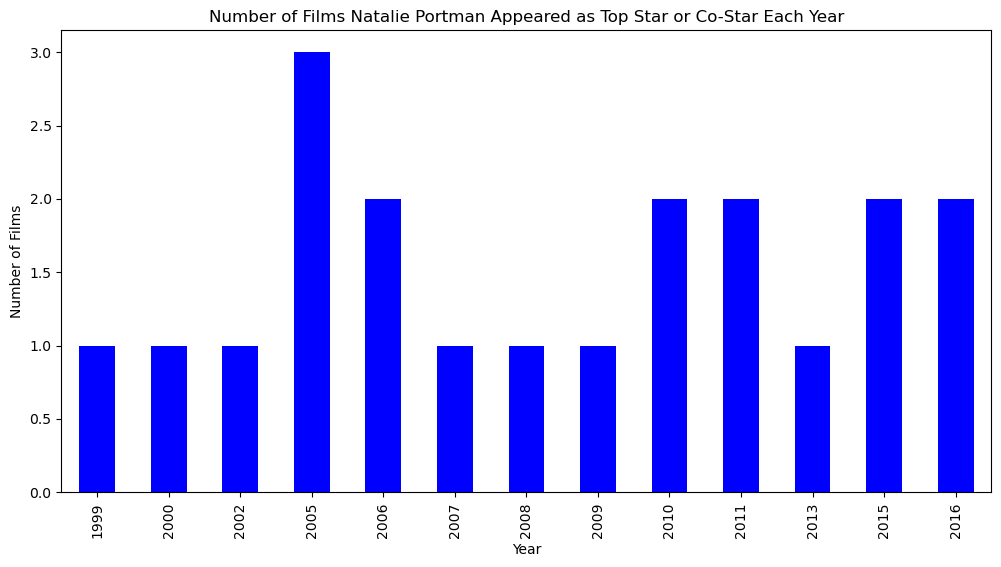

In [22]:
natalie_portman_top_co_star_films = cast[(cast['name'] == 'Natalie Portman') & (cast['n'].isin([1, 2]))]

# Group the DataFrame by year and count the number of films each year
natalie_portman_top_co_star_films_per_year = natalie_portman_top_co_star_films.groupby('year').size()

# Plotting a bar graph
plt.figure(figsize=(12, 6))
natalie_portman_top_co_star_films_per_year.plot(kind='bar', color='b')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number of Films')
plt.title('Number of Films Natalie Portman Appeared as Top Star or Co-Star Each Year')

# Display the plot
plt.show()

### 20. Determine how many roles for actor or actress by decade. Plot the output 

<Figure size 1200x600 with 0 Axes>

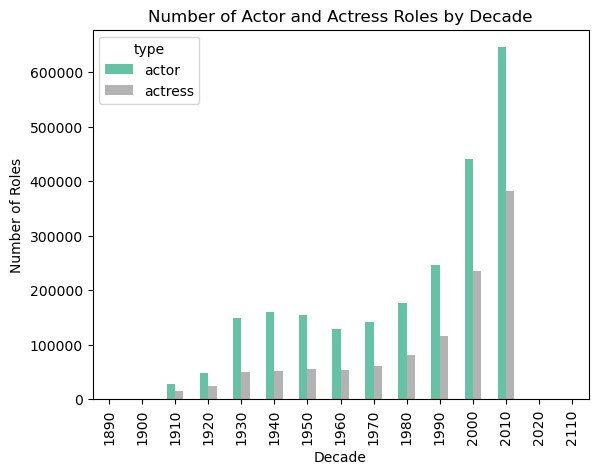

In [23]:
import matplotlib.pyplot as plt

# New column 'decade' in the cast DataFrame
cast['decade'] = (cast['year'] // 10) * 10

# Filter cast DataFrame for actor and actress roles
actor_actress_roles = cast[cast['type'].isin(['actor', 'actress'])]

# Group the DataFrame by decade and type, then count the number of roles
roles_by_decade = actor_actress_roles.groupby(['decade', 'type']).size().unstack().fillna(0)

# Plotting a stacked bar graph
plt.figure(figsize=(12, 6))
roles_by_decade.plot(kind='bar', colormap='Set2')

# Adding labels and title
plt.xlabel('Decade')
plt.ylabel('Number of Roles')
plt.title('Number of Actor and Actress Roles by Decade')

# Display the plot
plt.show()


### 21. Determine and comment on the day of the week that movies are released. What is notable about release days and months throughout the year? (Use pd.pivot_table)

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'date' column to datetime
release['date'] = pd.to_datetime(release['date'])

# Create new columns for day of the week and month
release['day_of_week'] = release['date'].dt.day_name()
release['month'] = release['date'].dt.month_name()

release_days_pivot = pd.pivot_table(release, index='day_of_week', columns='month', aggfunc='size')

days= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Create a pivot table to analyze the number of movie releases by month
pivot_table = release_days_pivot.reindex(index=days, columns=months)
pivot_table


month,January,February,March,April,May,June,July,August,September,October,November,December
day_of_week,,,,,,,,,,,,
Monday,3699,3138,3383,3168,3050,2337,2267,2844,3161,3551,3372,3240
Tuesday,1823,1190,1313,1446,1377,1179,1144,1121,1309,1542,1415,1903
Wednesday,4663,4118,4479,4650,4289,4282,4243,4270,4161,4605,4582,5097
Thursday,10746,10356,11844,10625,10100,9469,8947,9931,10713,11490,10859,10666
Friday,13734,13833,15268,13559,13198,11997,11635,13430,14523,14893,14084,13020
Saturday,2925,2395,2742,2868,2270,2409,2291,2277,2551,2700,2547,3357
Sunday,1822,1277,1228,1358,1165,1031,894,1138,1332,1423,1342,1813


### 22. Can you plot the pivot table? Is the output "correct"? Can you fix it?

<function matplotlib.pyplot.show(close=None, block=None)>

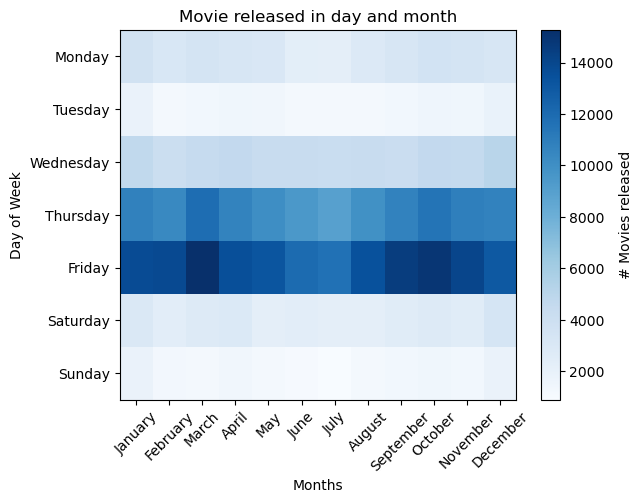

In [25]:
plt.imshow(pivot_table, cmap='Blues', aspect='auto')

plt.xticks(range(len(months)), months, rotation = 45)
plt.yticks(range(len(days)),days)

plt.colorbar(label='# Movies released', ax=None)

plt.xlabel('Months')
plt.ylabel('Day of Week')
plt.title ('Movie released in day and month')

plt.show

### 23. What films did actors in Star Wars go on to appear in? 

In [26]:
star_wars_actors = cast.dropna(subset=['title'])
star_wars_actors = star_wars_actors[star_wars_actors['title'].str.contains('Star Wars', case=False)]['name'].unique()

star_wars_cast = cast[cast['name'].isin(star_wars_actors)]

actors_appeareances = star_wars_cast.groupby('name')['title'].agg(list).reset_index()

for index, row in actors_appeareances.iterrows():
    actor = row['name']
    films = row['title']
    print(f"\n{actor} appeared in:")
    for film in films:
        print(f" - {film}")


Aaliyah Williams appeared in:
 - Star Wars: Episode III - Revenge of the Sith

Aaron (IV) Kennedy appeared in:
 - One Square Mile
 - Run All Night
 - Star Wars: Episode VII - The Force Awakens

Adam Bareham appeared in:
 - Star Wars: Episode VI - Return of the Jedi
 - Wilt

Adam Driver appeared in:
 - Bluebird
 - Frances Ha
 - Gayby
 - Hungry Hearts
 - Inside Llewyn Davis
 - J. Edgar
 - Lincoln
 - Logan Lucky
 - Midnight Special
 - Not Waving But Drowning
 - Paterson
 - Silence
 - Star Wars: Episode VII - The Force Awakens
 - The F Word
 - The Man Who Killed Don Quixote
 - The Meyerowitz Stories (New and Selected)
 - This Is Where I Leave You
 - Tough as They Come
 - Tracks
 - While We're Young

Adrian Allan appeared in:
 - Acquainted
 - Bridget Jones: The Edge of Reason
 - Bridget Jones: The Edge of Reason
 - Furious 6
 - Guardians of the Galaxy
 - Guardians of the Galaxy
 - Mamma Mia!
 - Star Wars: Episode VII - The Force Awakens

Adrian Man appeared in:
 - Call of the Jedi: A Star 